In [1]:
from hmcollab import datasets
from hmcollab import articles
from hmcollab import transactions
from hmcollab import models

In [2]:
import math
import pandas as pd
from sklearn.cluster import KMeans
from IPython.display import Image, display

## Get and know the data

In [3]:
dataset = datasets.HMDataset()

In [4]:
# Shapes
print('transactions: ', dataset.transactions.shape)
print('articles: ',dataset.articles.shape)

transactions:  (31788324, 5)
articles:  (105542, 25)


In [5]:
customer_ids = dataset.transactions.customer_id.unique()
print('Unique customers at transactions file')
customer_ids.shape   # (1362281,)

Unique customers at transactions file


(1362281,)

## Model

In [7]:
full_dummies = articles.ArticleFeaturesSimpleFeatures(dataset.articles, use_article_id=True).x
full_dummies.shape

(105542, 652)

In [8]:
recommendations = models.recommender_by_customer(customer_ids[0], dataset, full_dummies)
recommendations

['0455832001',
 '0487722001',
 '0750424014',
 '0576773015',
 '0378135003',
 '0378447003',
 '0794321007',
 '0838770002',
 '0870304002',
 '0632172003',
 '0351484002',
 '0506191003']

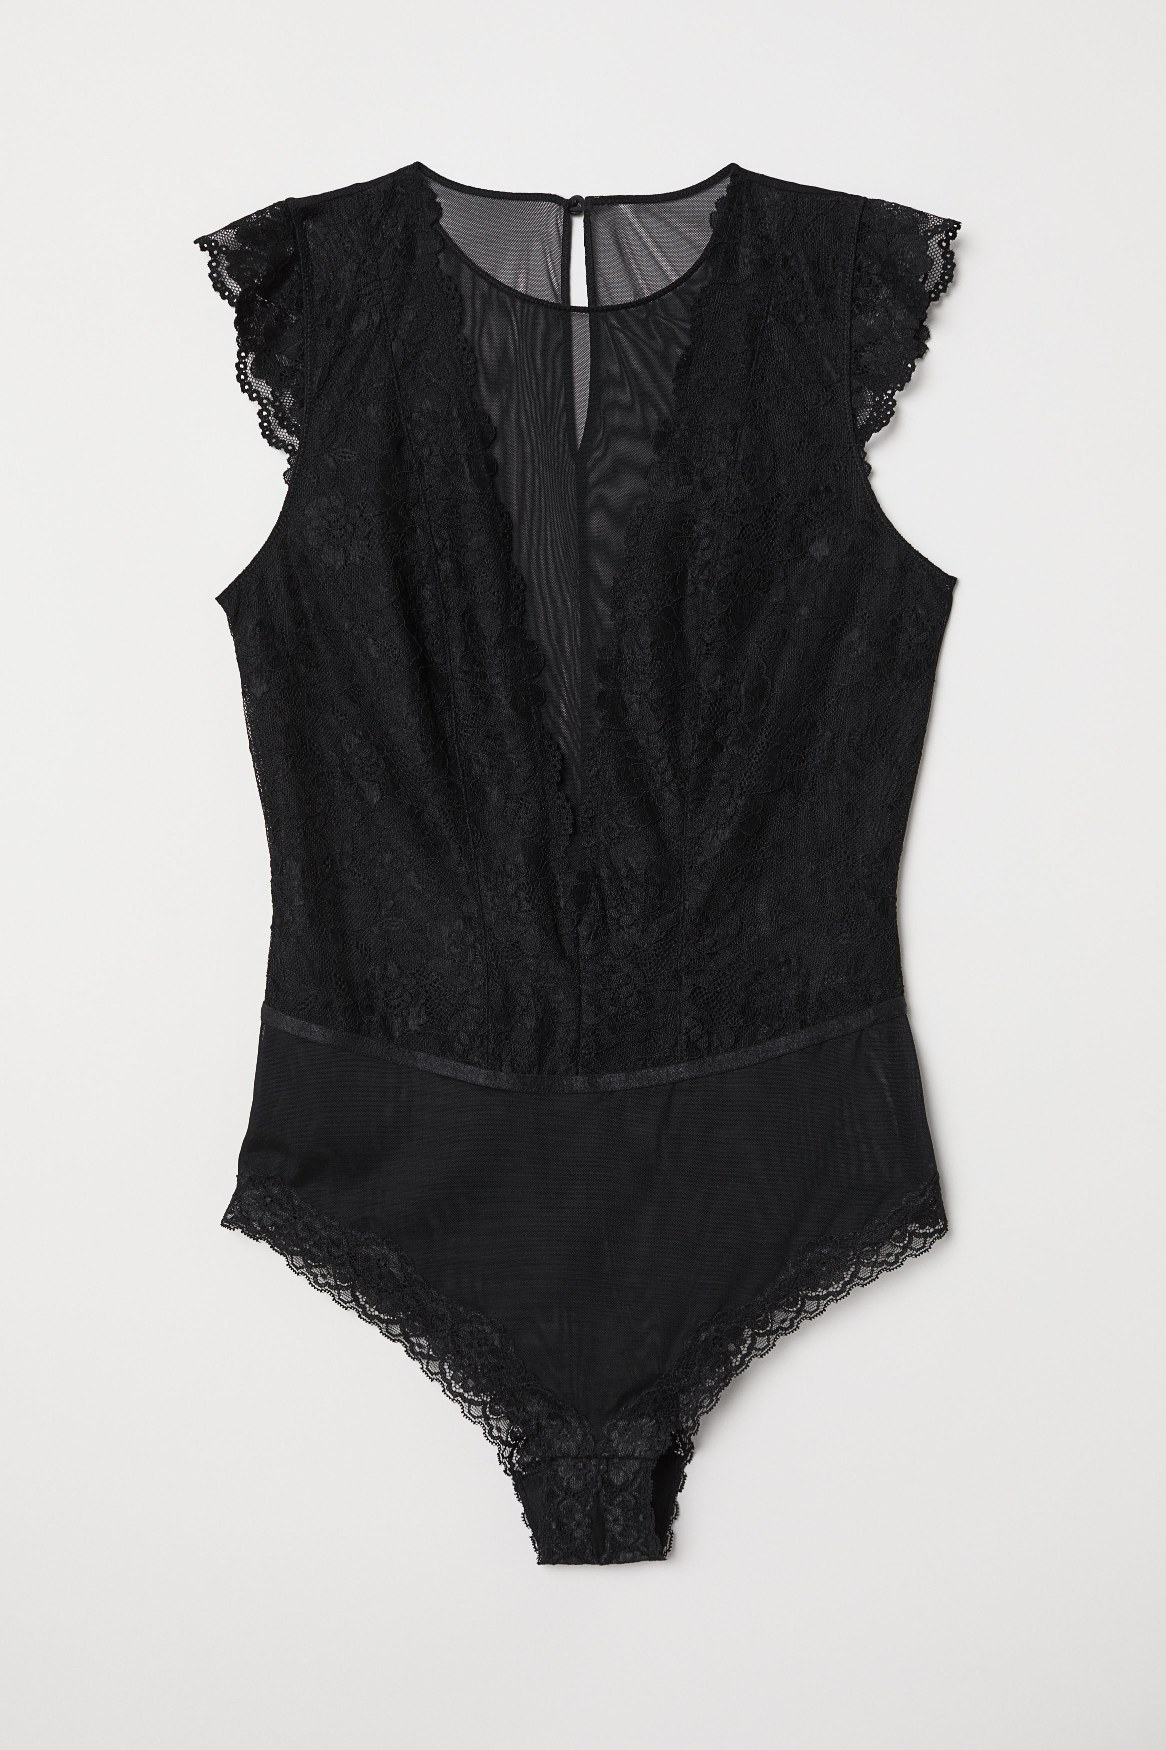

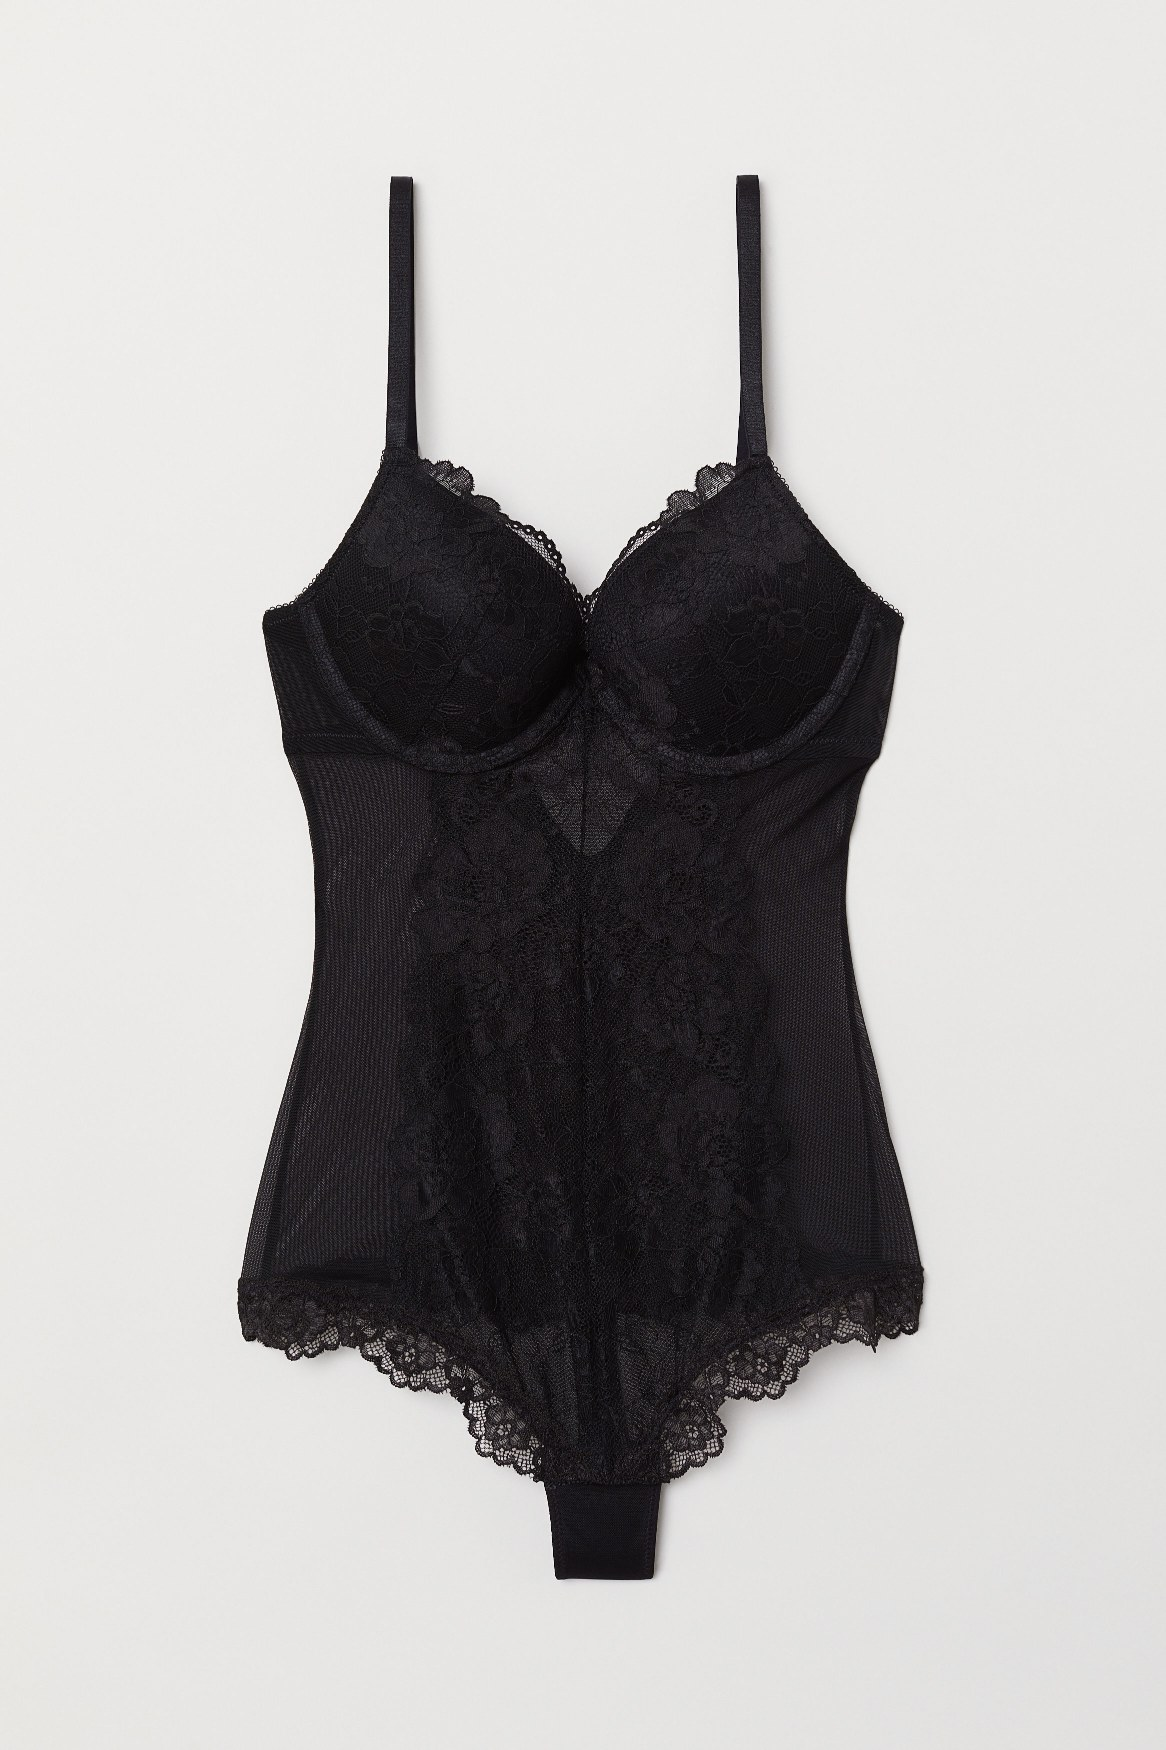

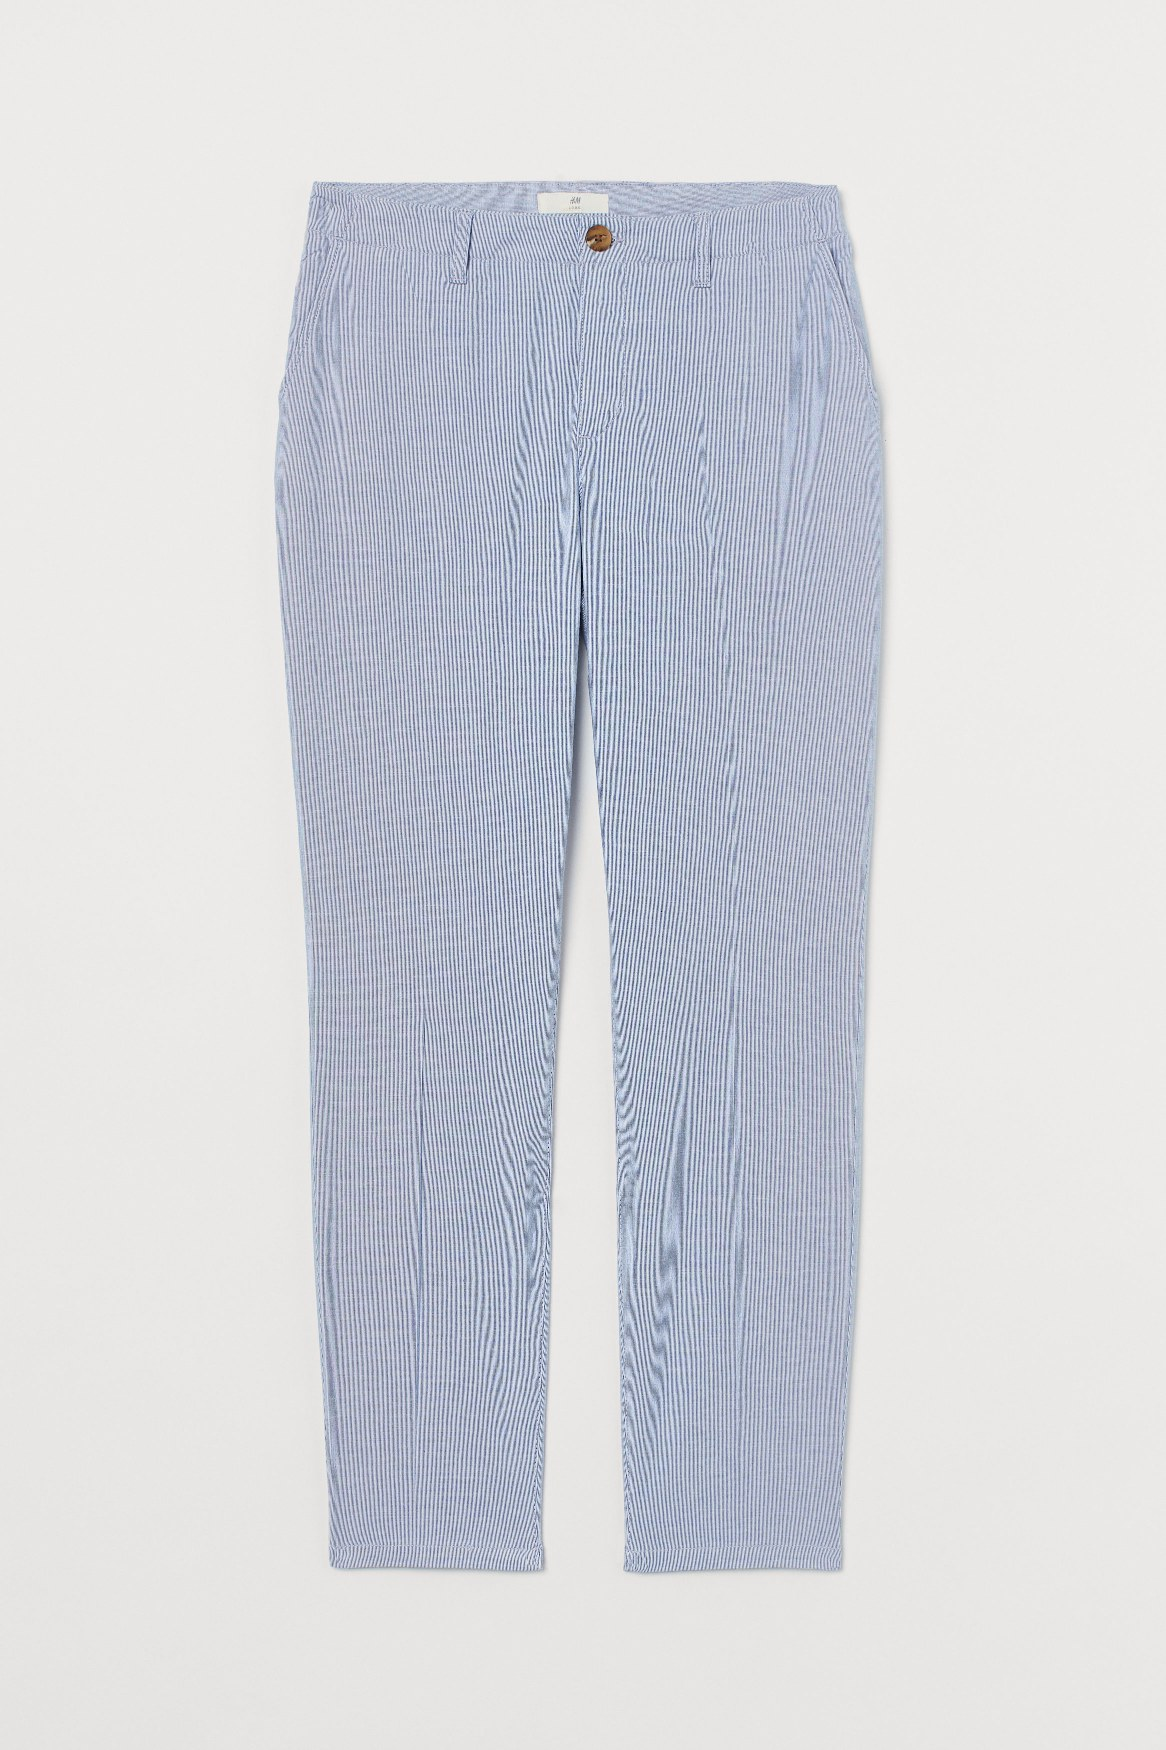

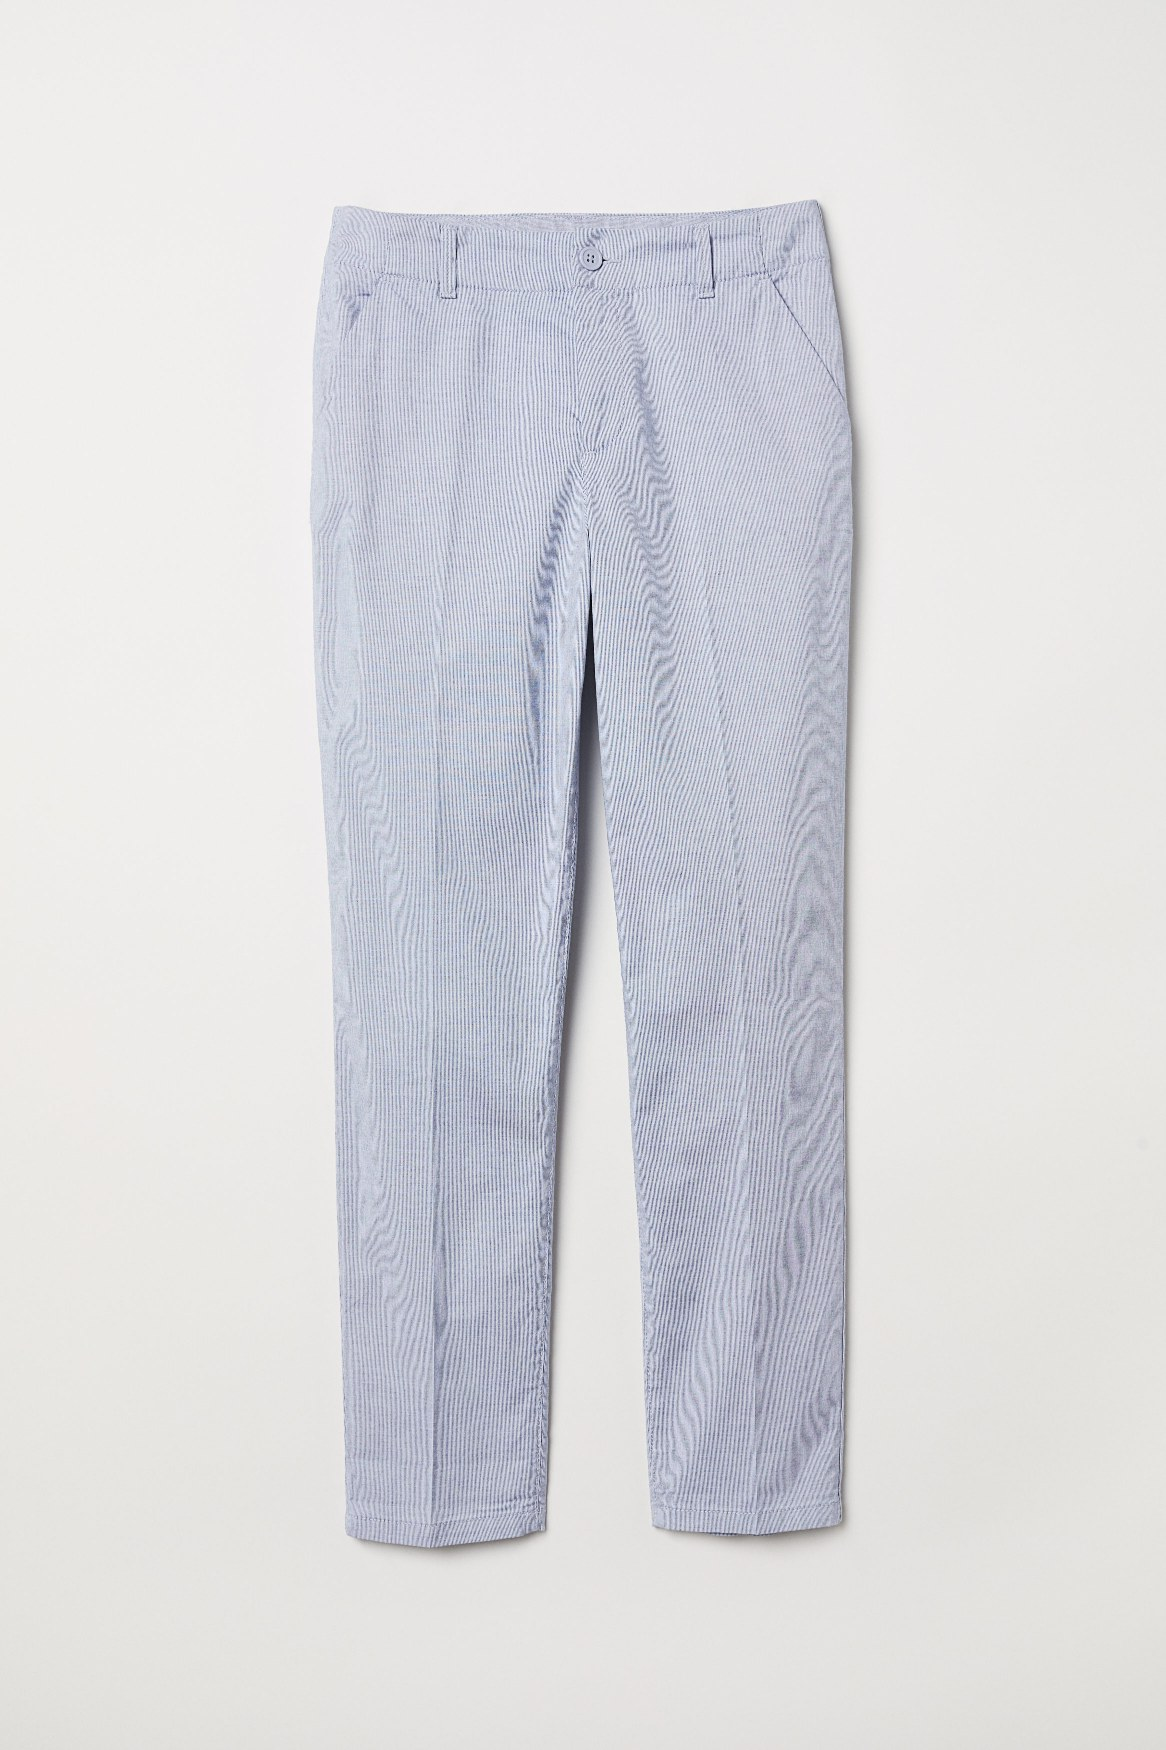

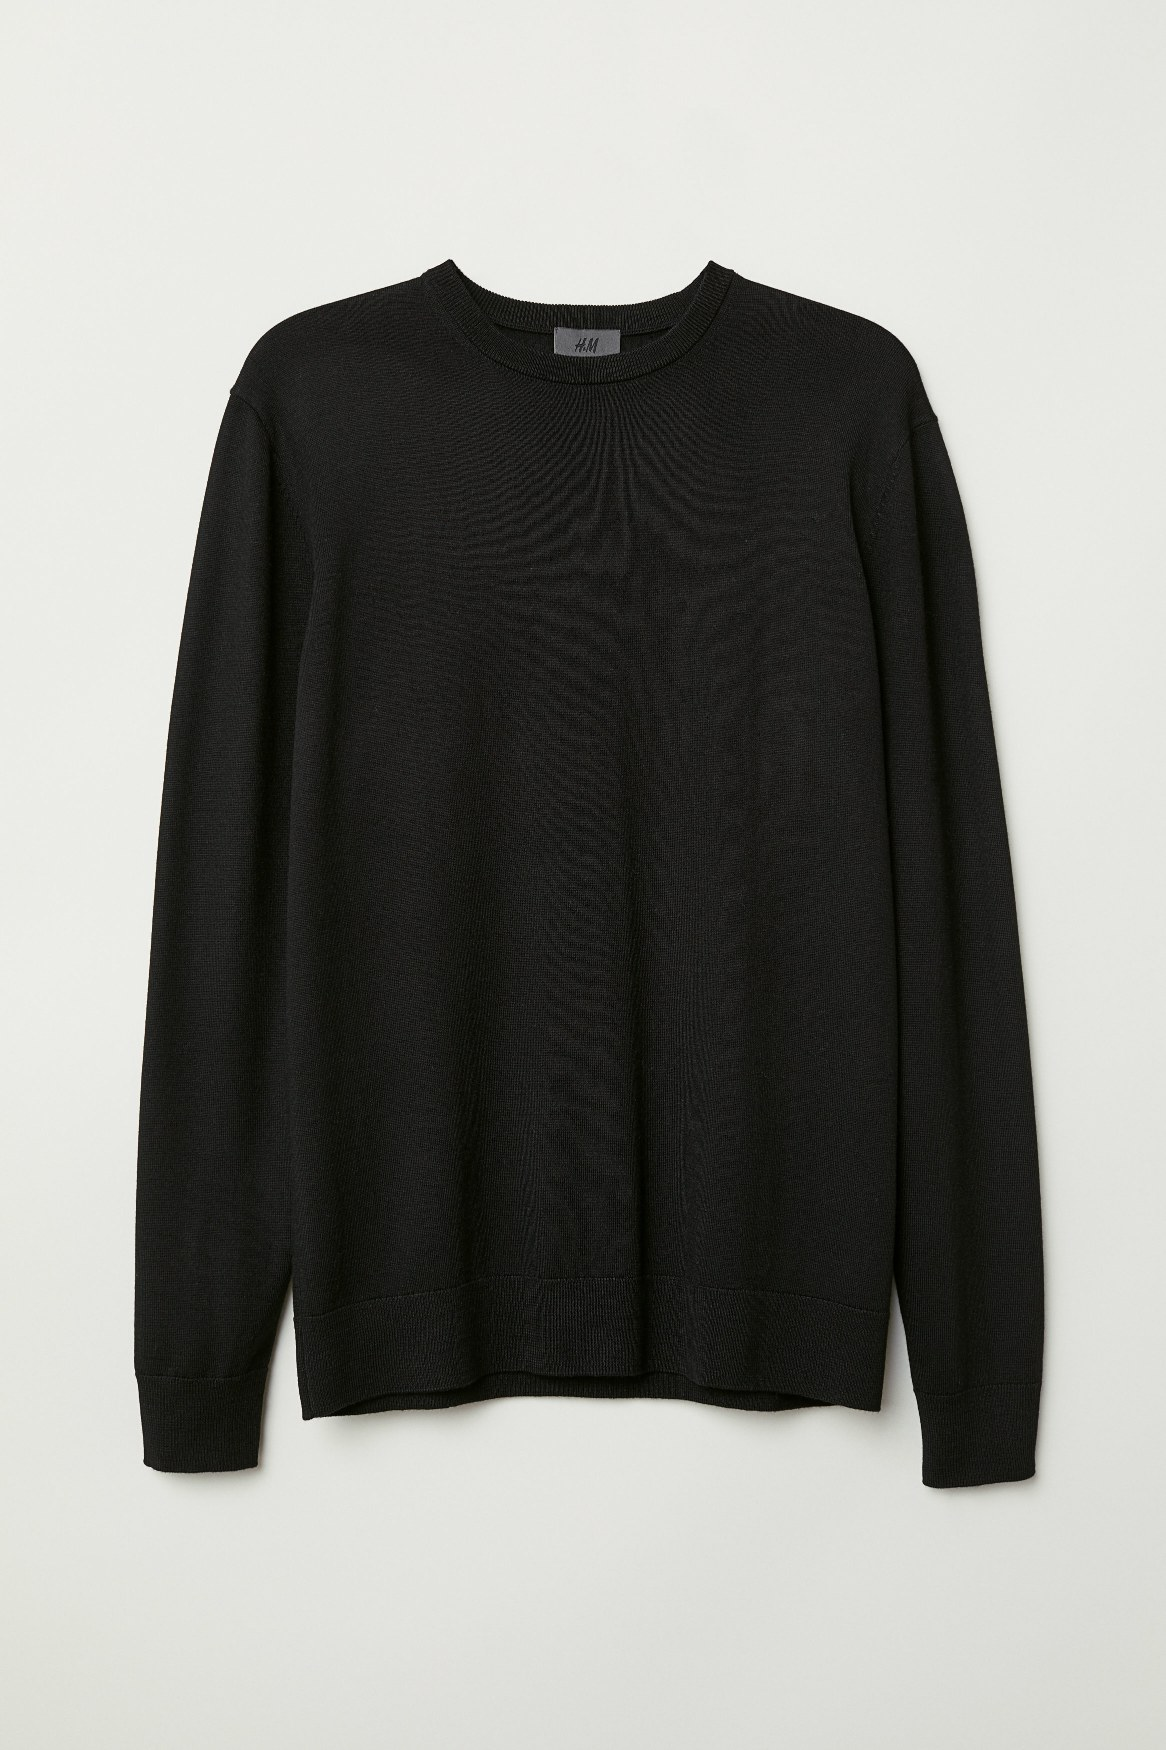

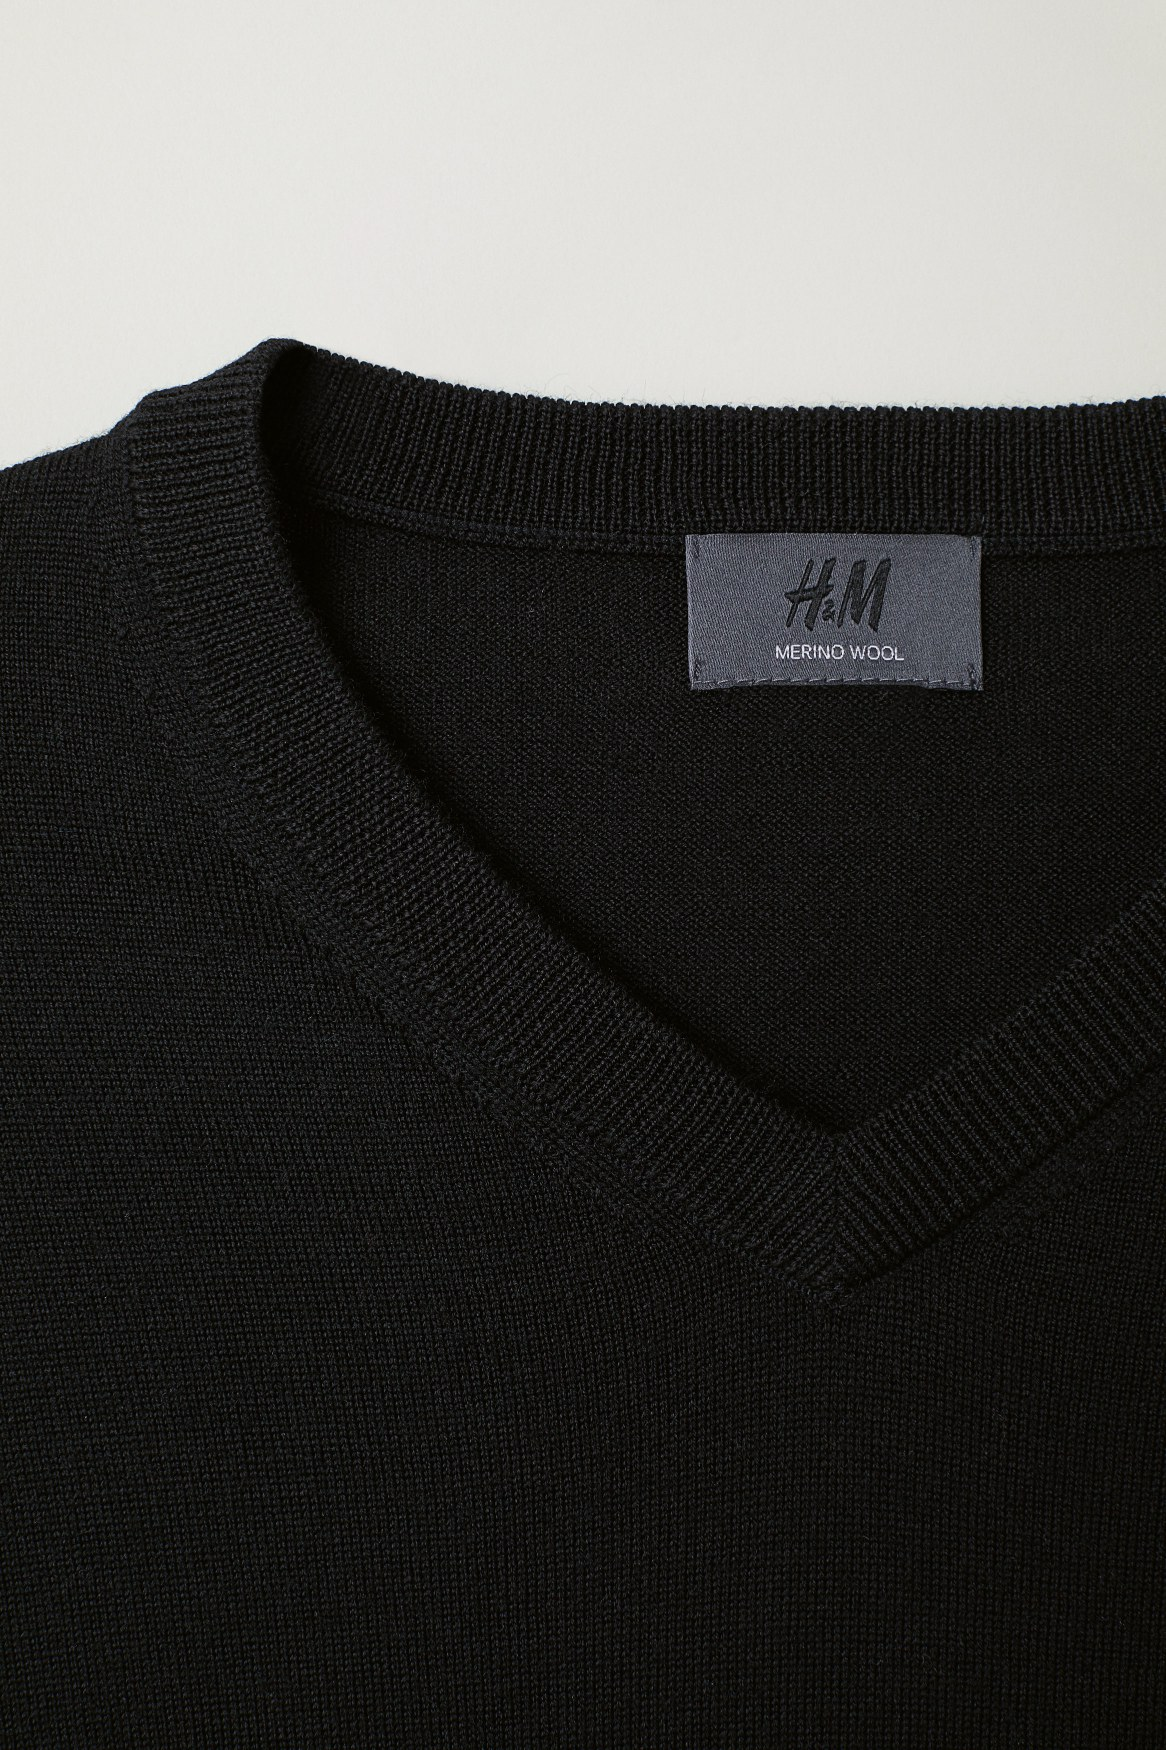

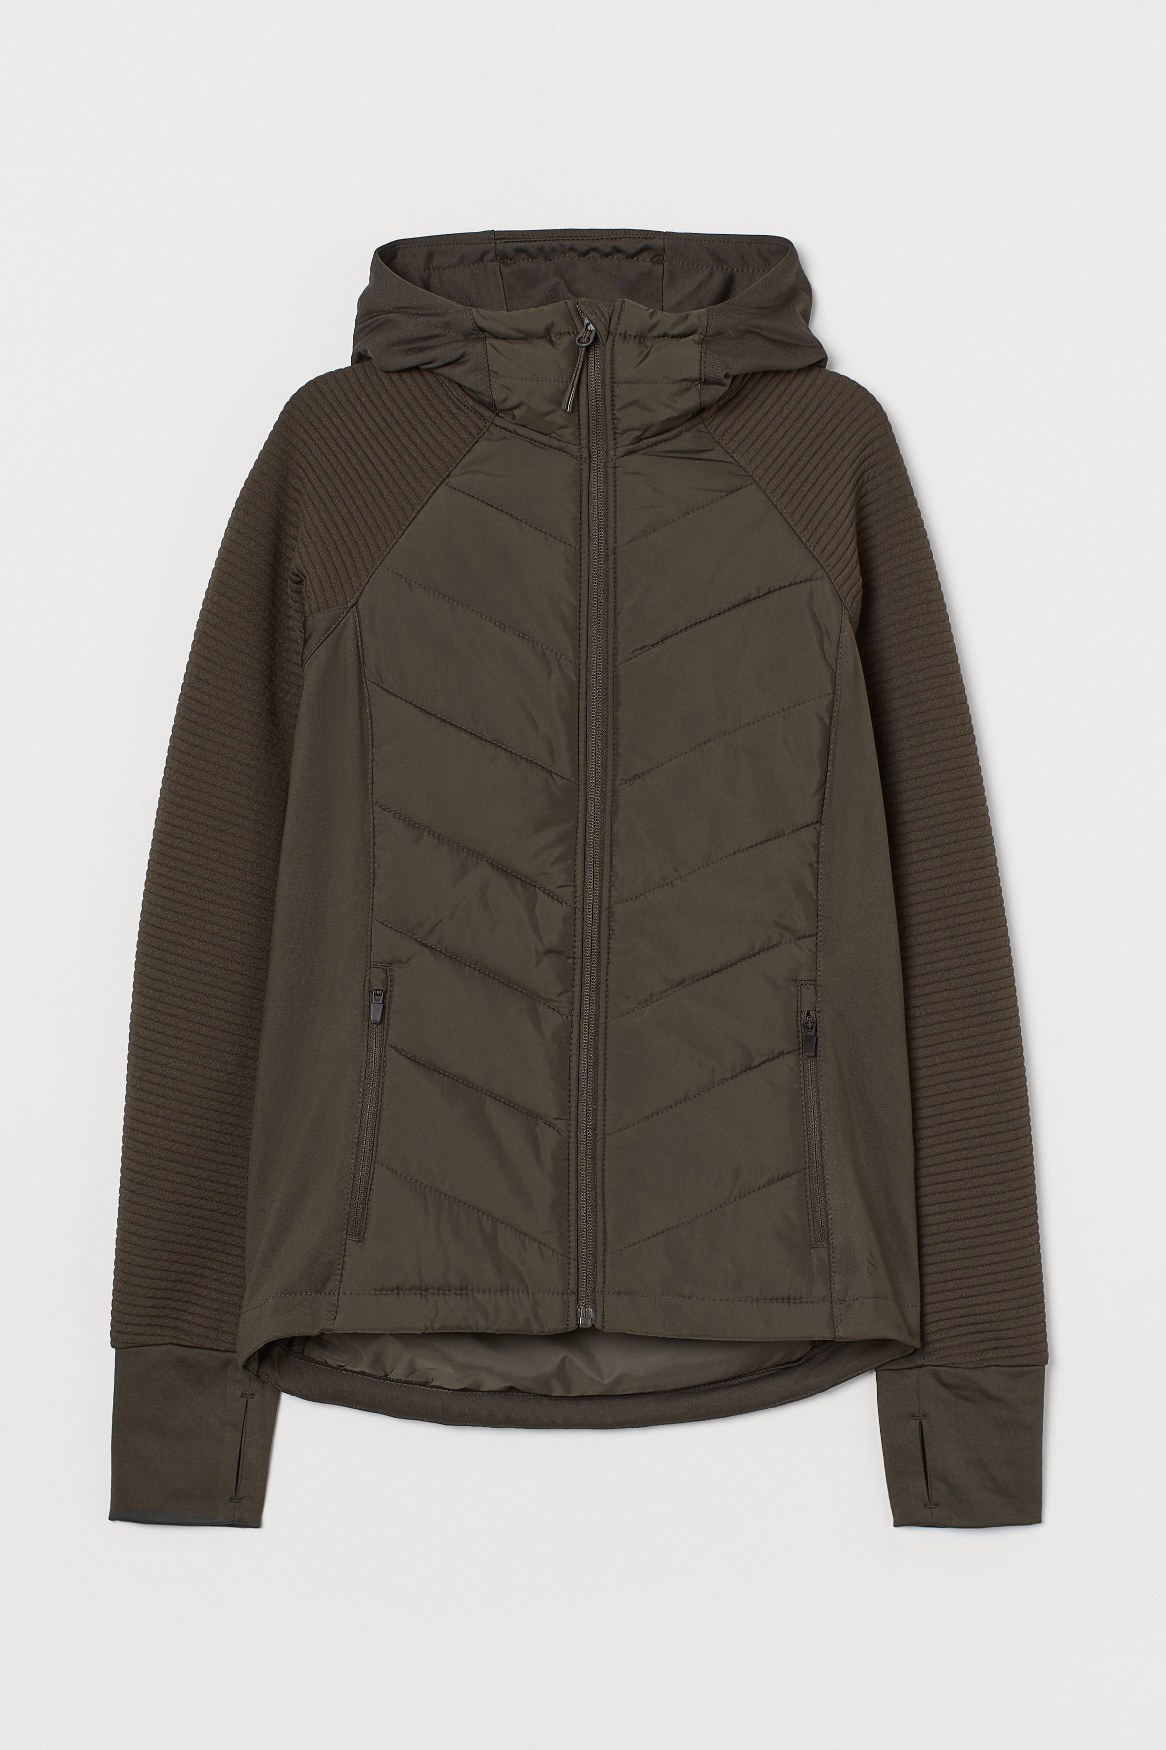

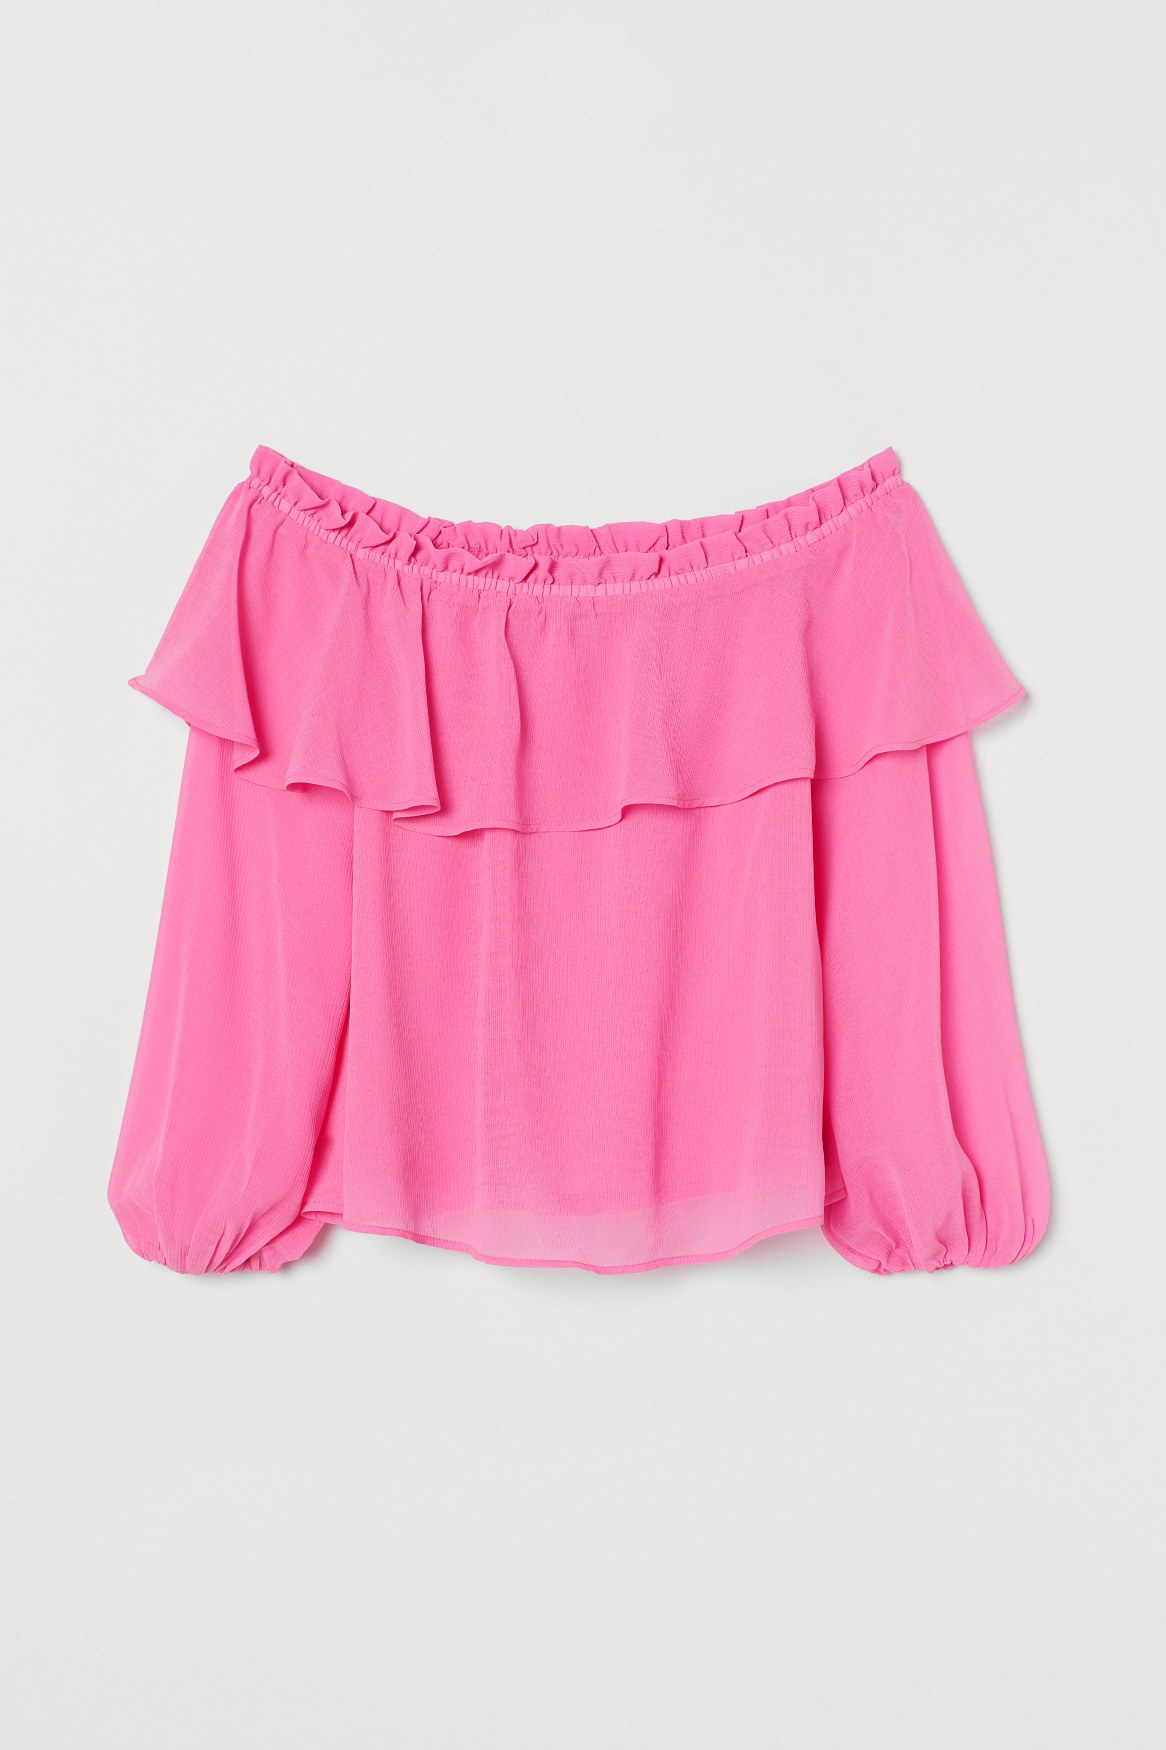

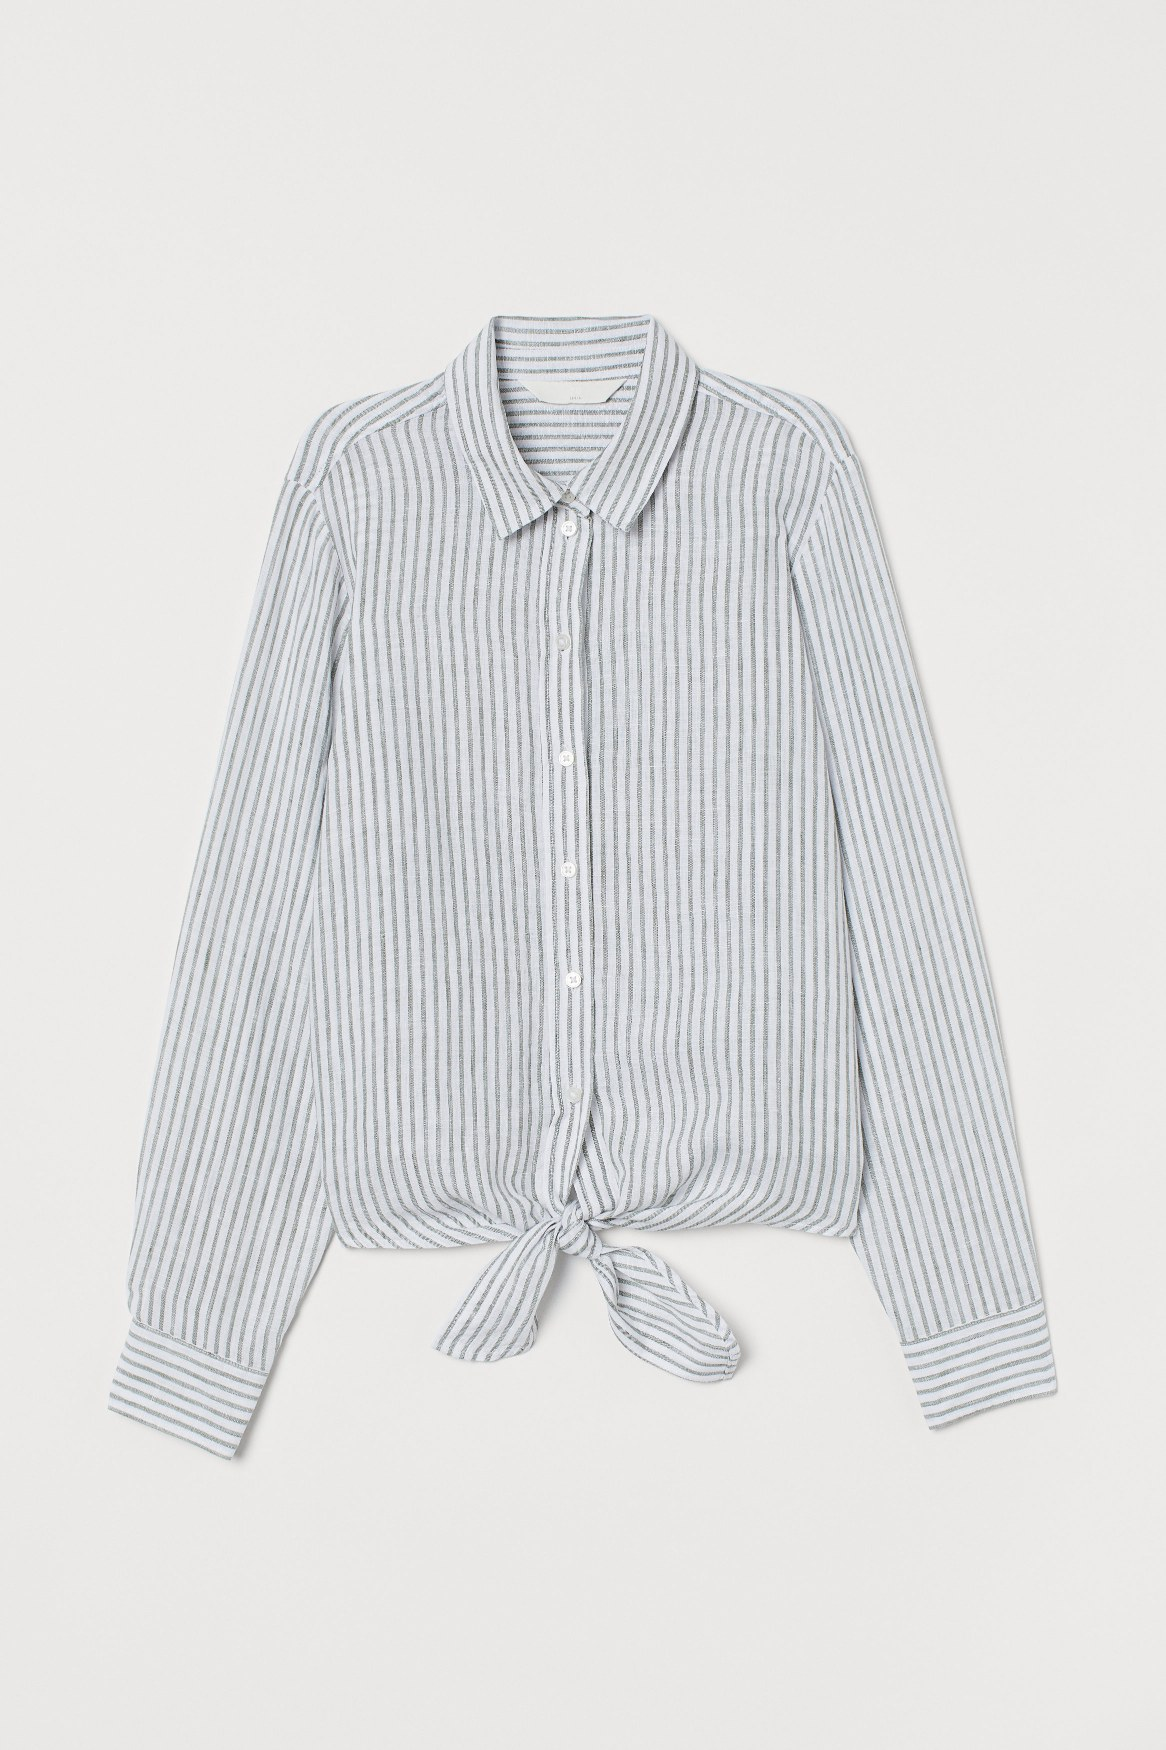

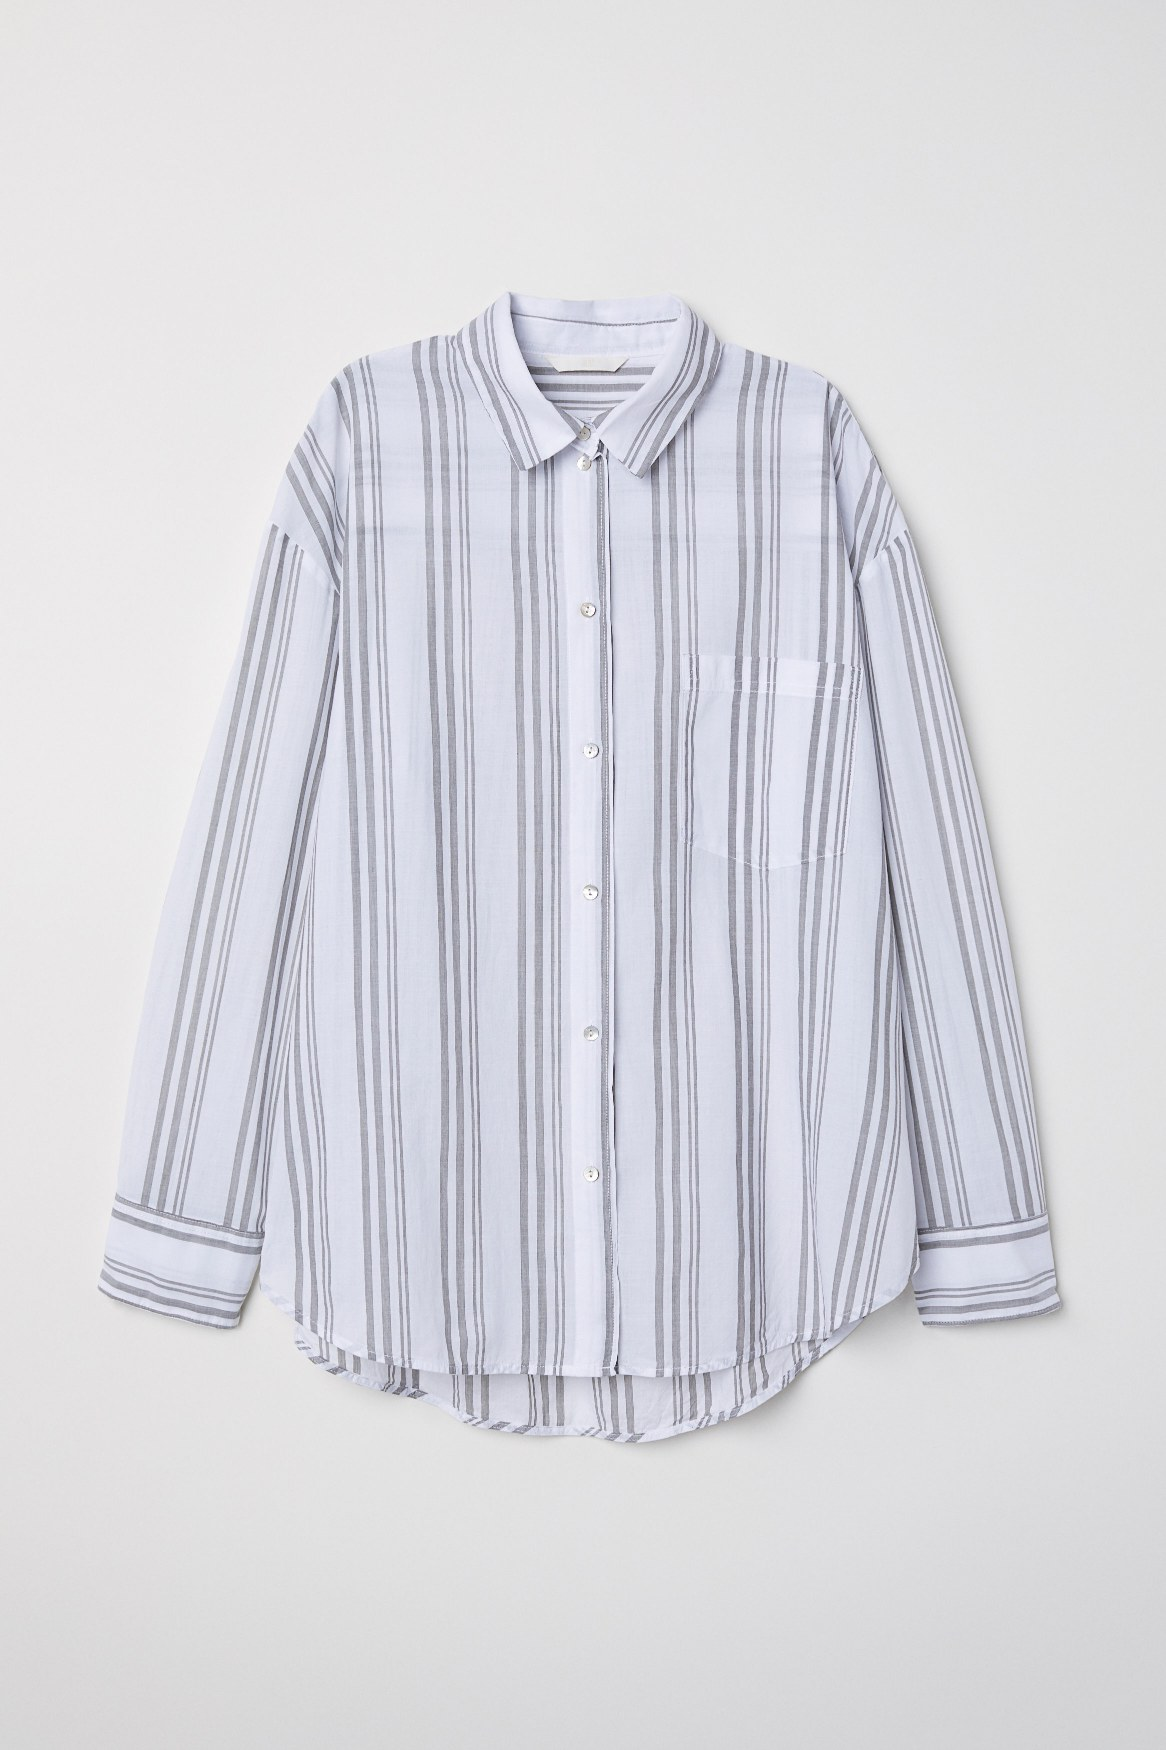

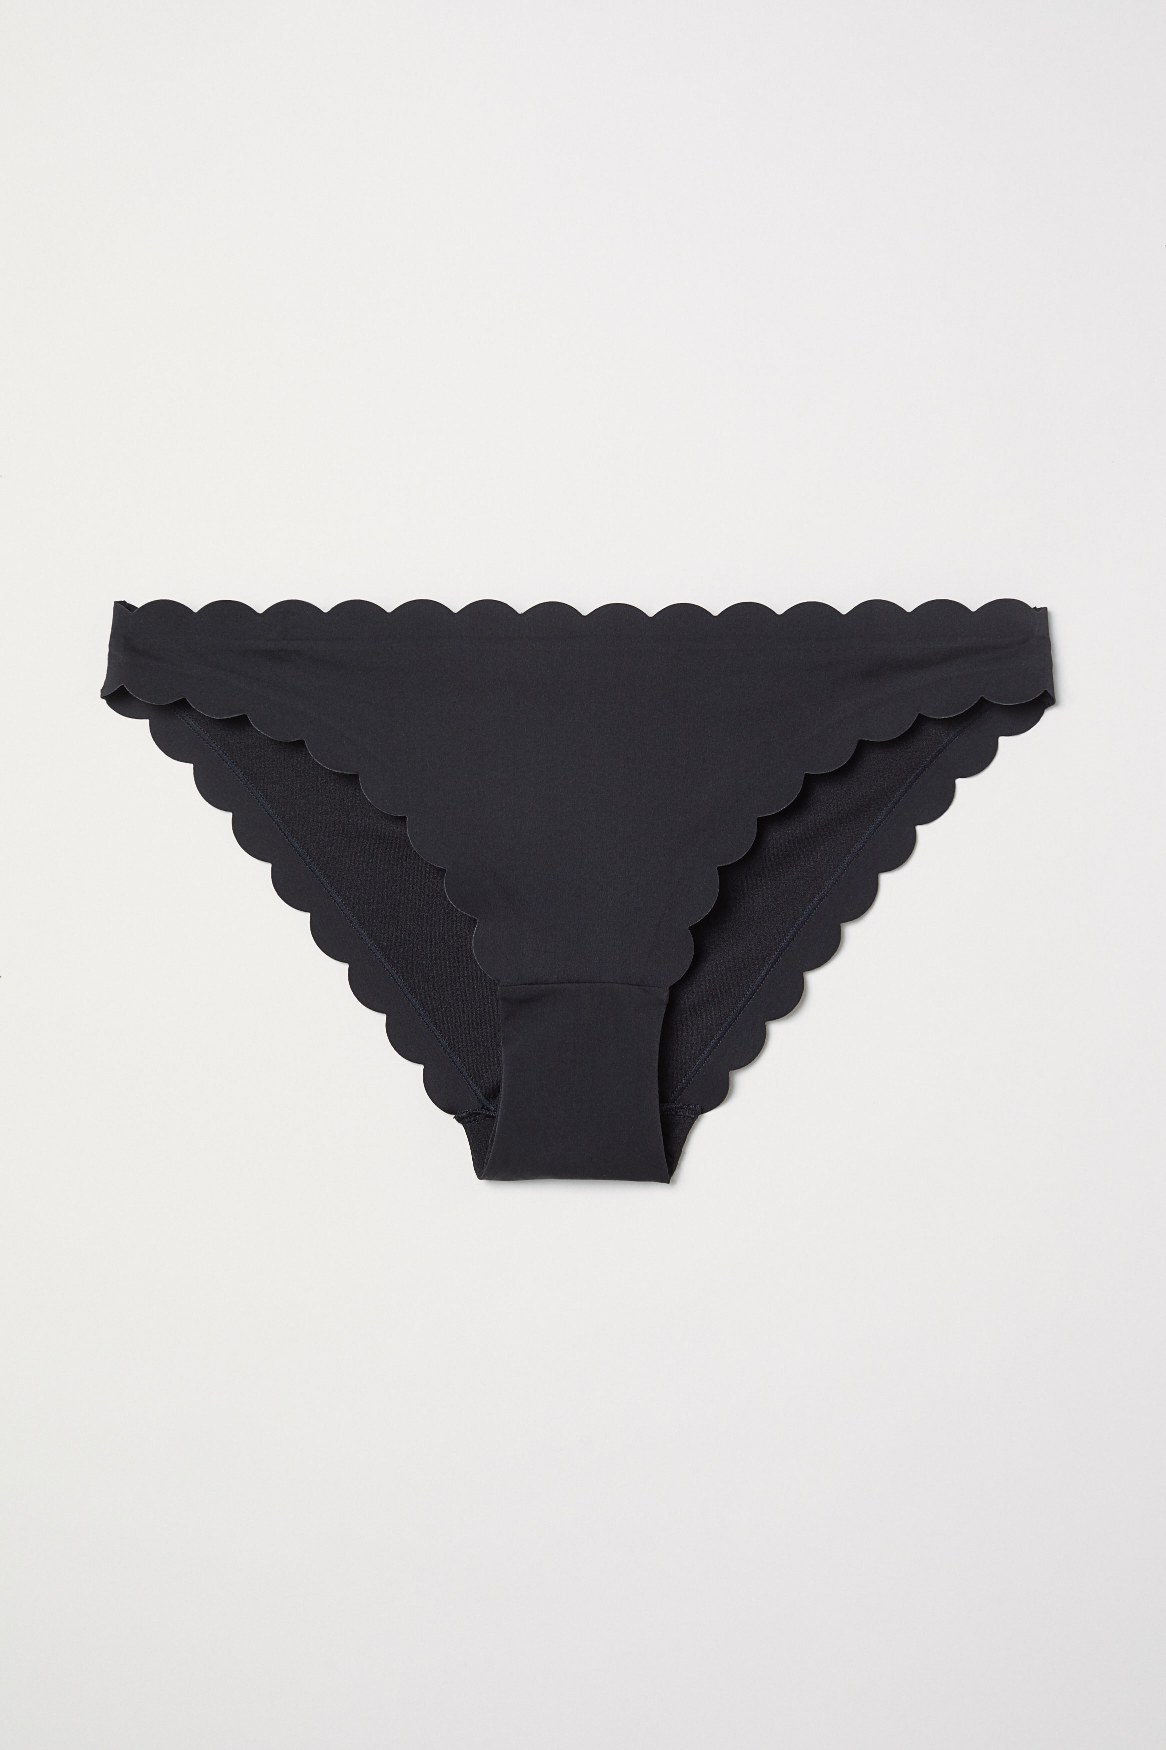

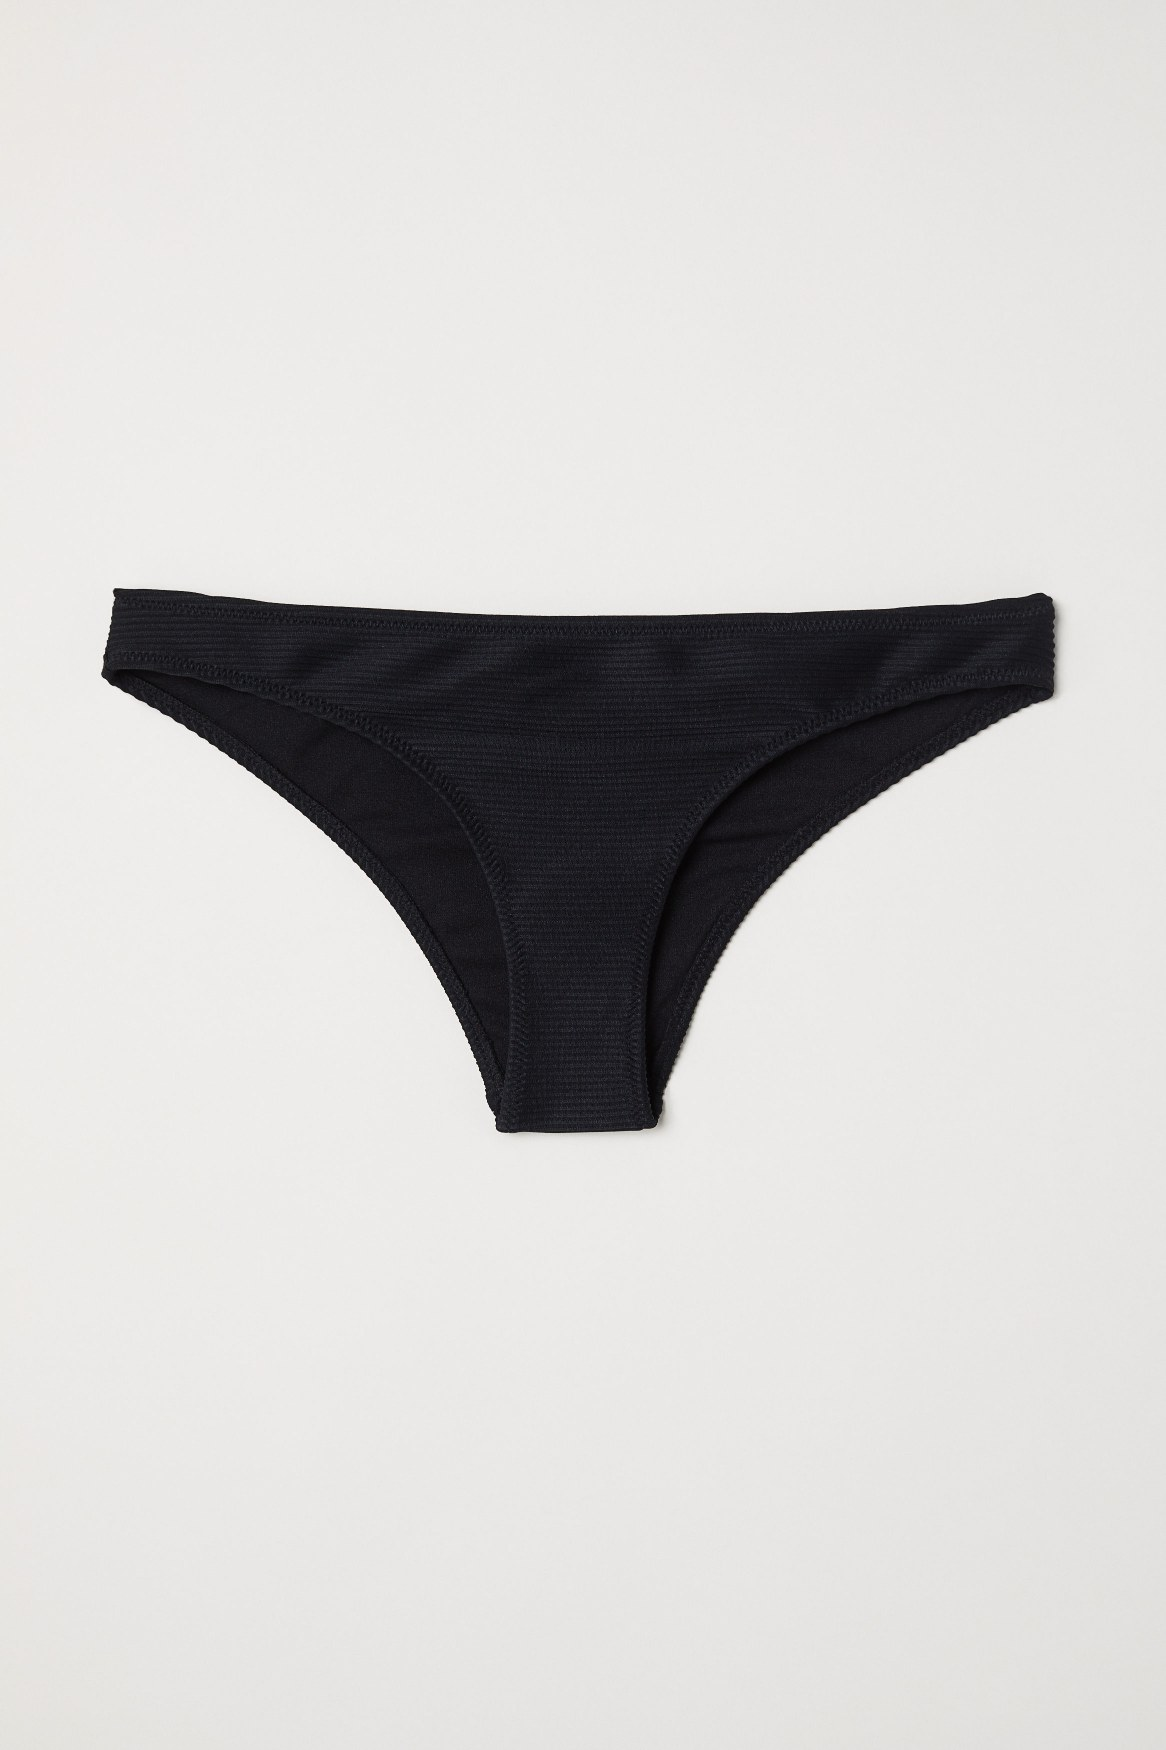

In [9]:
def display_articles(articles):
    for article_id in articles:
        filename = dataset.tree.image(article_id)
        display(Image(filename, width = 300, height = 100))

display_articles(recommendations)

In [11]:
results = models.recommender(customer_ids[:3], dataset, full_dummies)
results.head()

customer_id  \
0  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   
1  00007d2de826758b65a93dd24ce629ed66842531df6699...   
2  00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...   

                                          prediction  
0  0455832001 0487722001 0750424014 0576773015 03...  
1  0312878001 0647483001 0316553025 0433252004 06...  
2  0510789001 0546662001 0351484002 0506191003 04...